In [10]:
#importint the libraries 
# sistema operativo y paths
import os
from pathlib import Path 
# tratamiento de datos (ingesta, manipulación)
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
# visualización
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

#from py_dotenv import dotenv, read_dotenv
#from dotenv import dotenv_values,load_dotenv

#One hot encoding 
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

In [11]:

#ENV = dotenv_values(".env")
#load_dotenv(override=False)
#DATASETS_PATH = r'C:\Users\EGGO\Documents\Python\Repositories\machine_learning_unsupervised_algorithms\Datasets'
#csv_file = "C:/Users/EGGO/Documents/Python/Repositories/machine_learning_unsupervised_algorithms/Datasets/marketing_campaign.csv"
csv_file = '/data/notebook_files/marketing_campaign.csv'

In [12]:
#first we upload the dataset 

#Primero cargaremos nuestro set de datos
df_house = pd.read_csv(csv_file, sep='\t')
df_house


#xls = pd.ExcelFile(os.environ['DATASETS_PATH'] + r'\marketing_campaign.csv')
#fileName = os.environ['DATASETS_PATH'] + '/marketing_campaign.csv'
#df_house = pd.read_excel(fileName, sheet_name='Data')
#df_house = pd.read_csv(os.path.basename(csv_file))

#split the data in train abd test

ID 
 Year_Birth 
 Education 
 Marital_Status 
 Income 
 Kidhome 
 Teenhome 
 Dt_Customer 
 Recency 
 MntWines 
 ... 
 NumWebVisitsMonth 
 AcceptedCmp3 
 AcceptedCmp4 
 AcceptedCmp5 
 AcceptedCmp1 
 AcceptedCmp2 
 Complain 
 Z_CostContact 
 Z_Revenue 
 Response 
 
 
 
 
 0 
 5524 
 1957 
 Graduation 
 Single 
 58138.0 
 0 
 0 
 04-09-2012 
 58 
 635 
 ... 
 7 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 1 
 
 
 1 
 2174 
 1954 
 Graduation 
 Single 
 46344.0 
 1 
 1 
 08-03-2014 
 38 
 11 
 ... 
 5 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 2 
 4141 
 1965 
 Graduation 
 Together 
 71613.0 
 0 
 0 
 21-08-2013 
 26 
 426 
 ... 
 4 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 3 
 6182 
 1984 
 Graduation 
 Together 
 26646.0 
 1 
 0 
 10-02-2014 
 26 
 11 
 ... 
 6 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 4 
 5324 
 1981 
 PhD 
 Married 
 58293.0 
 1 
 0 
 19-01-2014 
 94 
 173 
 ... 
 5 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2235 
 10870 
 1967 
 Graduation 
 Married 
 61223.0 
 0 
 1 
 13-06-2013 
 46 
 709 
 ... 
 5 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 2236 
 4001 
 1946 
 PhD 
 Together 
 64014.0 
 2 
 1 
 10-06-2014 
 56 
 406 
 ... 
 7 
 0 
 0 
 0 
 1 
 0 
 0 
 3 
 11 
 0 
 
 
 2237 
 7270 
 1981 
 Graduation 
 Divorced 
 56981.0 
 0 
 0 
 25-01-2014 
 91 
 908 
 ... 
 6 
 0 
 1 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 2238 
 8235 
 1956 
 Master 
 Together 
 69245.0 
 0 
 1 
 24-01-2014 
 8 
 428 
 ... 
 3 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 0 
 
 
 2239 
 9405 
 1954 
 PhD 
 Married 
 52869.0 
 1 
 1 
 15-10-2012 
 40 
 84 
 ... 
 7 
 0 
 0 
 0 
 0 
 0 
 0 
 3 
 11 
 1 
 
 
 
 2240 rows × 29 columns

In [13]:
df_house.info()
df = df_house

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [14]:
list_keys = df_house.columns.tolist()
print (list_keys)

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [15]:
df_describe = df_house[list_keys]
df_describe.describe()

ID 
 Year_Birth 
 Income 
 Kidhome 
 Teenhome 
 Recency 
 MntWines 
 MntFruits 
 MntMeatProducts 
 MntFishProducts 
 ... 
 NumWebVisitsMonth 
 AcceptedCmp3 
 AcceptedCmp4 
 AcceptedCmp5 
 AcceptedCmp1 
 AcceptedCmp2 
 Complain 
 Z_CostContact 
 Z_Revenue 
 Response 
 
 
 
 
 count 
 2240.000000 
 2240.000000 
 2216.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 ... 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.000000 
 2240.0 
 2240.0 
 2240.000000 
 
 
 mean 
 5592.159821 
 1968.805804 
 52247.251354 
 0.444196 
 0.506250 
 49.109375 
 303.935714 
 26.302232 
 166.950000 
 37.525446 
 ... 
 5.316518 
 0.072768 
 0.074554 
 0.072768 
 0.064286 
 0.013393 
 0.009375 
 3.0 
 11.0 
 0.149107 
 
 
 std 
 3246.662198 
 11.984069 
 25173.076661 
 0.538398 
 0.544538 
 28.962453 
 336.597393 
 39.773434 
 225.715373 
 54.628979 
 ... 
 2.426645 
 0.259813 
 0.262728 
 0.259813 
 0.245316 
 0.114976 
 0.096391 
 0.0 
 0.0 
 0.356274 
 
 
 min 
 0.000000 
 1893.000000 
 1730.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 3.0 
 11.0 
 0.000000 
 
 
 25% 
 2828.250000 
 1959.000000 
 35303.000000 
 0.000000 
 0.000000 
 24.000000 
 23.750000 
 1.000000 
 16.000000 
 3.000000 
 ... 
 3.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 3.0 
 11.0 
 0.000000 
 
 
 50% 
 5458.500000 
 1970.000000 
 51381.500000 
 0.000000 
 0.000000 
 49.000000 
 173.500000 
 8.000000 
 67.000000 
 12.000000 
 ... 
 6.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 3.0 
 11.0 
 0.000000 
 
 
 75% 
 8427.750000 
 1977.000000 
 68522.000000 
 1.000000 
 1.000000 
 74.000000 
 504.250000 
 33.000000 
 232.000000 
 50.000000 
 ... 
 7.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 3.0 
 11.0 
 0.000000 
 
 
 max 
 11191.000000 
 1996.000000 
 666666.000000 
 2.000000 
 2.000000 
 99.000000 
 1493.000000 
 199.000000 
 1725.000000 
 259.000000 
 ... 
 20.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 3.0 
 11.0 
 1.000000 
 
 
 
 8 rows × 26 columns

 + mean = Media es el promedio de los datos
 + std = La desviación estándar mide la dispersión de una distribución de datos
 + 25% = El primer cuartil Q1, es el valor en el cual o por debajo del cual queda aproximadamente un cuarto (25%) de todos los valores de la sucesión (ordenada)
 + 50% = El segundo cuartil Q2 es el valor por debajo del cual queda el 50% de los datos (Mediana)
 + 75% =el tercer cuartil Q3 es el valor por debajo del cual quedan las tres cuartas partes (75%) de los datos.
 + MAX y Min : valores mayor y menor

# Analisis Univariado

# Indice de compras por lugar

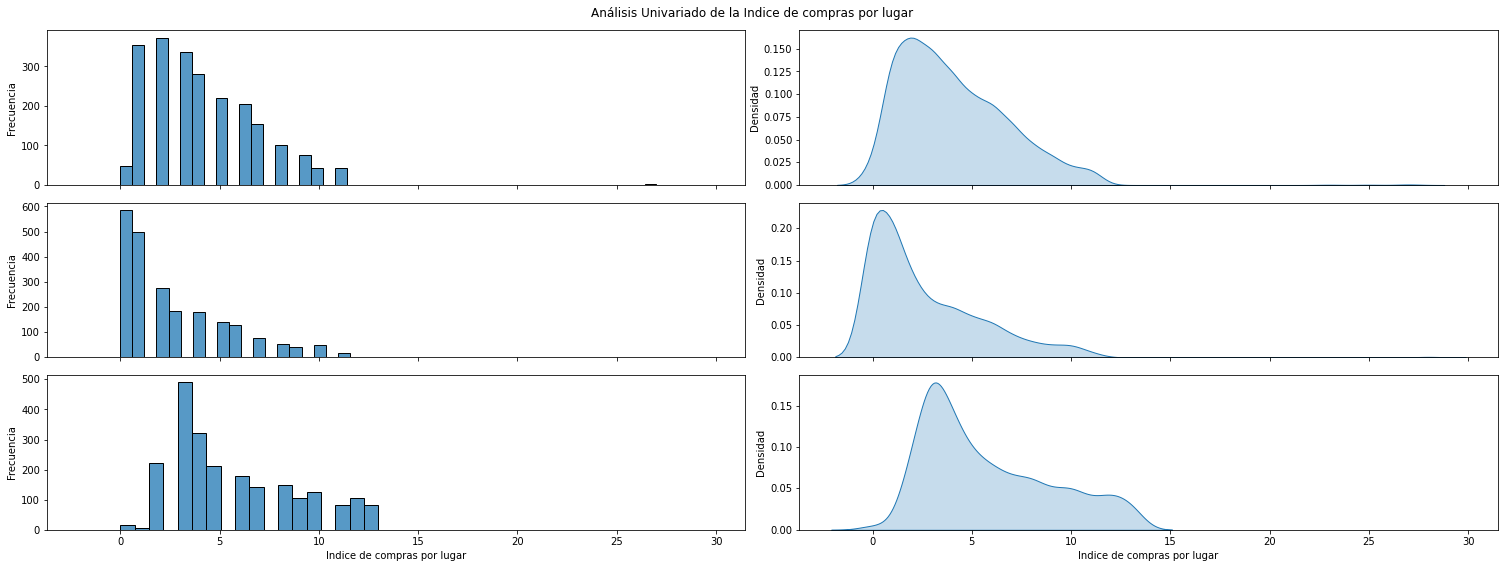

In [16]:
var_web = 'NumWebPurchases'
var_catalog = 'NumCatalogPurchases'
var_store = 'NumStorePurchases'
var_title = 'Indice de compras por lugar' 
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 8), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var_web], ax=ax[0,0], kde=False)
ax[0,0].set_xlabel(var_title)
ax[0,0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var_web], ax=ax[0,1], fill=True)
ax[0,1].set_xlabel(var_title)
ax[0,1].set_ylabel('Densidad')


# Plotea el histograma
sns.histplot(data=df[var_catalog], ax=ax[1,0], kde=False)
ax[1,0].set_xlabel(var_title)
ax[1,0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var_catalog], ax=ax[1,1], fill=True)
ax[1,1].set_xlabel(var_title)
ax[1,1].set_ylabel('Densidad')


# Plotea el histograma
sns.histplot(data=df[var_store], ax=ax[2,0], kde=False)
ax[2,0].set_xlabel(var_title)
ax[2,0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var_store], ax=ax[2,1], fill=True)
ax[2,1].set_xlabel(var_title)
ax[2,1].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

# Compras en tienda web

Text(0, 0.5, 'Densidad')

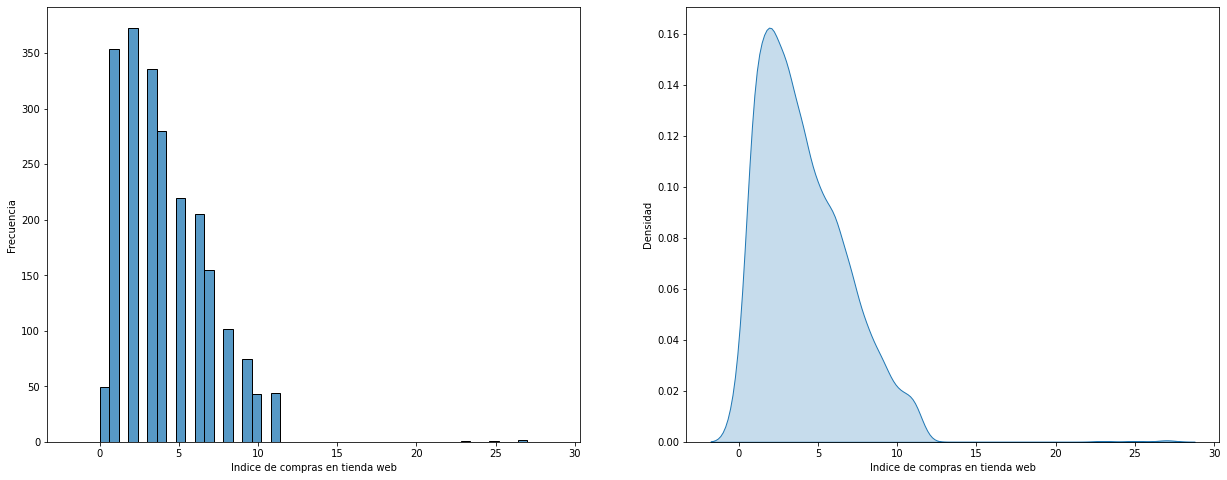

In [17]:
var = 'NumWebPurchases'
var_title = 'Indice de compras en tienda web' 
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 8), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

# Compras por catalogo

Text(0, 0.5, 'Densidad')

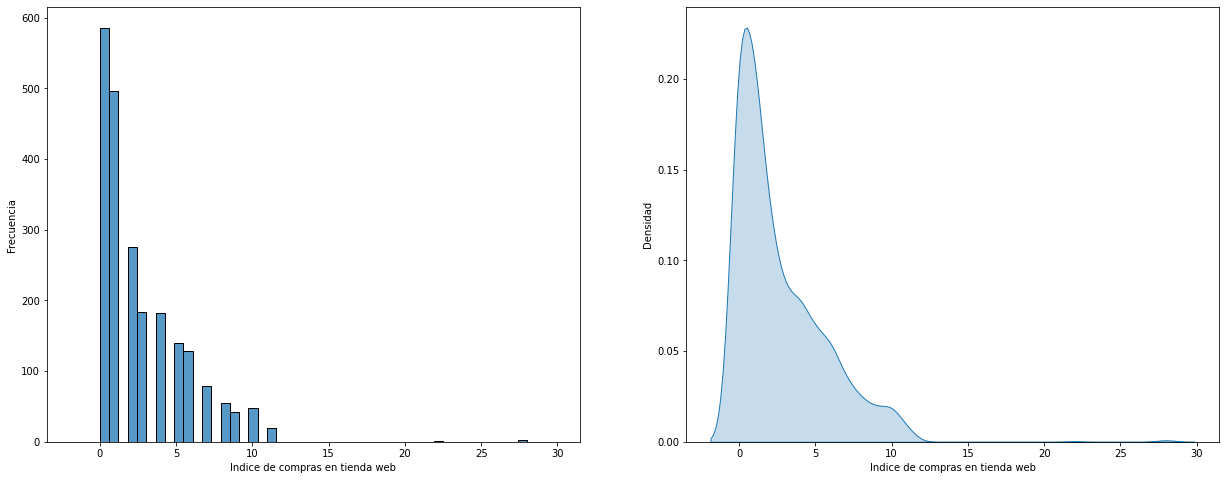

In [18]:
var = 'NumCatalogPurchases'
var_title = 'Indice de compras en tienda web' 
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 8), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

# Compras en tienda

Text(0, 0.5, 'Densidad')

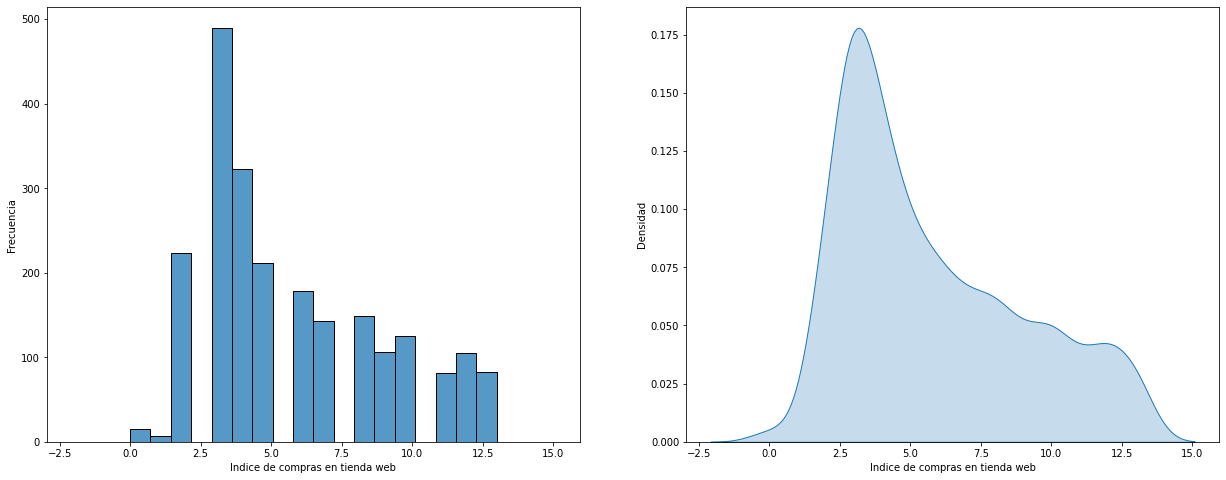

In [19]:
var = 'NumStorePurchases'
var_title = 'Indice de compras en tienda web' 
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 8), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')

# Año de nacimiento

Text(0, 0.5, 'Frecuencia')

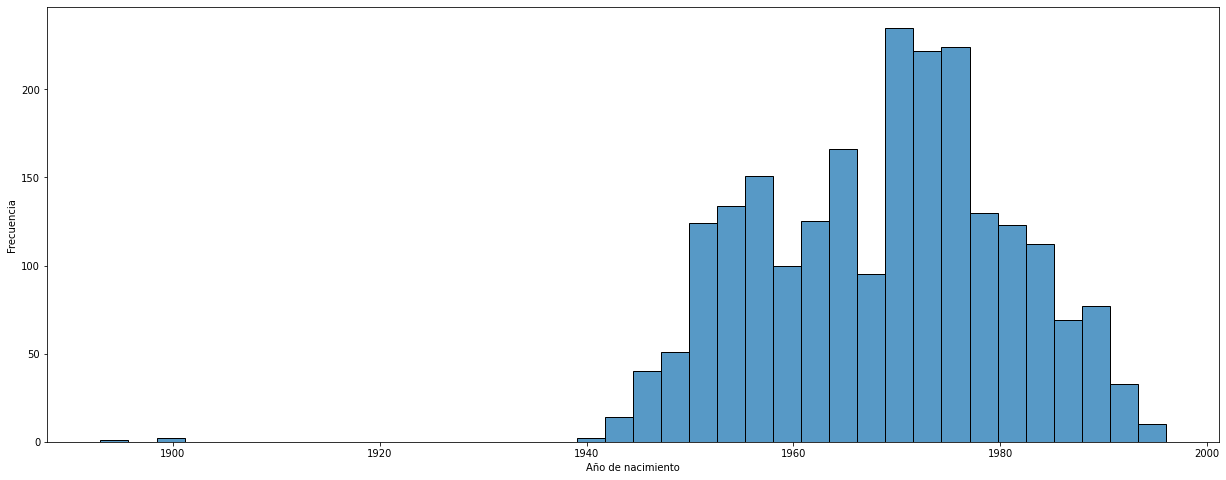

In [20]:
var = 'Year_Birth'
var_title = 'Año de nacimiento' 
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(21, 8), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax, kde=False)
ax.set_xlabel(var_title)
ax.set_ylabel('Frecuencia')


# Educacion

Text(0, 0.5, 'Frecuencia')

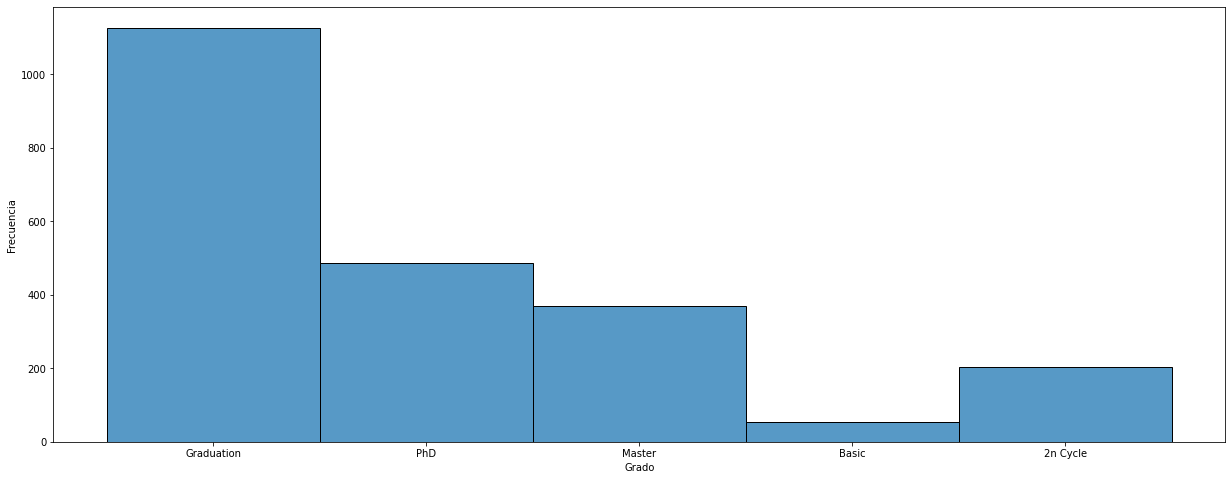

In [21]:
var = 'Education'
var_title = 'Grado' 
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(21, 8), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax, kde=False)
ax.set_xlabel(var_title)
ax.set_ylabel('Frecuencia')

# Ingresos

Text(0, 0.5, 'Densidad')

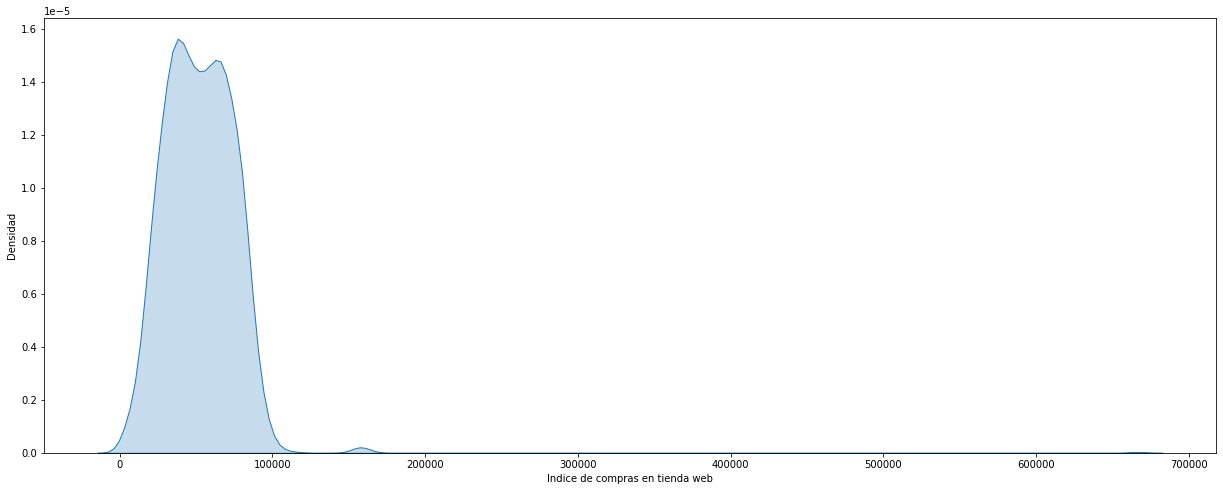

In [22]:
var = 'Income'
var_title = 'Indice de compras en tienda web' 
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(21, 8), sharex=True)



# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax, fill=True)
ax.set_xlabel(var_title)
ax.set_ylabel('Densidad')

# Visitas vs compras en internet

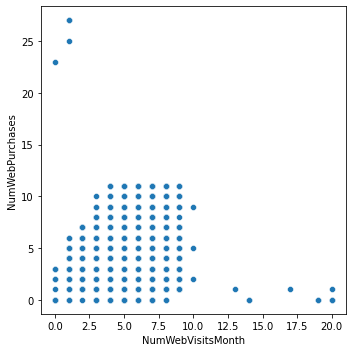

In [23]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="NumWebVisitsMonth", y="NumWebPurchases", ax=ax)
plt.tight_layout()

"\n# Ajustes de la figura de Matplotlib\nfig, ax = plt.subplots(nrows=6, ncols=2, figsize=(30, 50), sharex=True)\n\n# convert to long (tidy) form\n\n# Plotea el histograma\nsns.histplot(data=df[var_wines], ax=ax[0,0], kde=False)\nax[0,0].set_xlabel(var_title)\nax[0,0].set_ylabel('Vinos')\n\n\n# Plotea la curva de densidad\nsns.kdeplot(data=df[var_wines], ax=ax[0,1], fill=True)\nax[0,1].set_xlabel(var_title)\nax[0,1].set_ylabel('Vinos')\n\n\n# Plotea el histograma\nsns.histplot(data=df[var_fruits], ax=ax[1,0], kde=False)\nax[1,0].set_xlabel(var_title)\nax[1,0].set_ylabel('Fruta')\n\n\n# Plotea la curva de densidad\nsns.kdeplot(data=df[var_fruits], ax=ax[1,1], fill=True)\nax[1,1].set_xlabel(var_title)\nax[1,1].set_ylabel('Fruta')\n\n\n# Plotea el histograma\nsns.histplot(data=df[var_meat], ax=ax[2,0], kde=False)\nax[2,0].set_xlabel(var_title)\nax[2,0].set_ylabel('Carne')\n\n\n# Plotea la curva de densidad\nsns.kdeplot(data=df[var_meat], ax=ax[2,1], fill=True)\nax[2,1].set_xlabel(var_titl

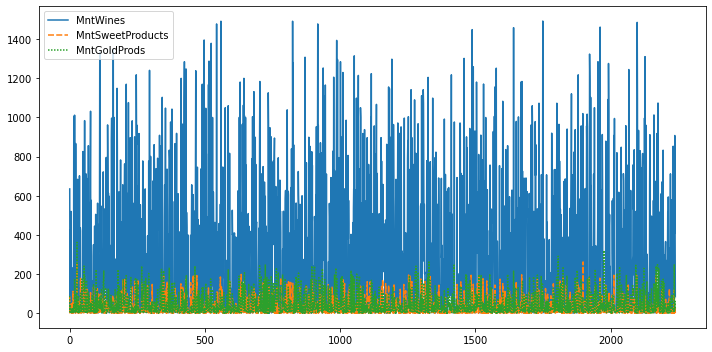

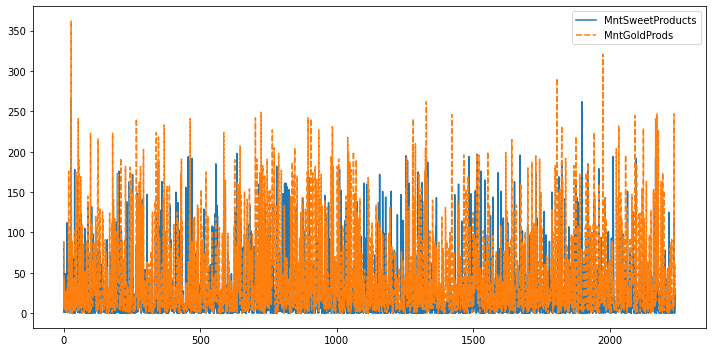

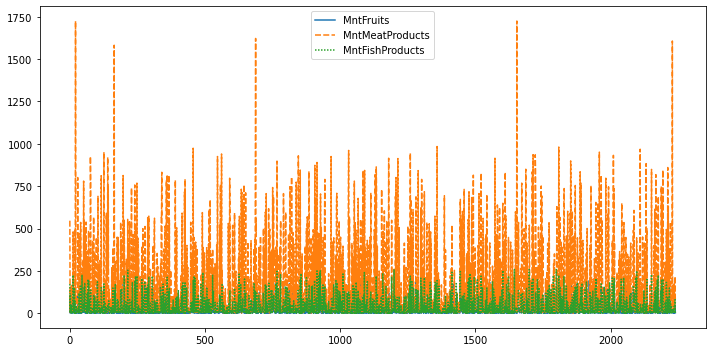

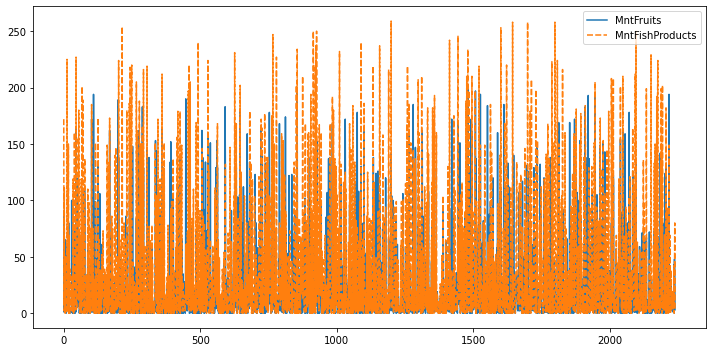

In [24]:
#Compras por visita
var_wines = 'MntWines'
var_fruits = 'MntFruits'
var_meat = 'MntMeatProducts'
var_fish = 'MntFishProducts'
var_sweet = 'MntSweetProducts'
var_gold = 'MntGoldProds'
var_title = 'Indice de compras por producto' 

'''
df_noceros = df.copy()
df_noceros = df_noceros[[var_wines, var_sweet, var_gold]]
df_noceros[var_wines] = df_noceros[df_noceros[var_wines] != 0]
df_noceros[var_sweet] = df_noceros[df_noceros[var_sweet] != 0] 
df_noceros[var_gold] = df_noceros[var_gold][df_noceros[var_gold] != 0]
'''

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df[[var_wines, var_sweet, var_gold]])
plt.tight_layout()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df[[var_sweet, var_gold]])
plt.tight_layout()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df[[var_fruits, var_meat, var_fish]])
plt.tight_layout()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df[[var_fruits, var_fish]])
plt.tight_layout()

'''
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(30, 50), sharex=True)

# convert to long (tidy) form

# Plotea el histograma
sns.histplot(data=df[var_wines], ax=ax[0,0], kde=False)
ax[0,0].set_xlabel(var_title)
ax[0,0].set_ylabel('Vinos')


# Plotea la curva de densidad
sns.kdeplot(data=df[var_wines], ax=ax[0,1], fill=True)
ax[0,1].set_xlabel(var_title)
ax[0,1].set_ylabel('Vinos')


# Plotea el histograma
sns.histplot(data=df[var_fruits], ax=ax[1,0], kde=False)
ax[1,0].set_xlabel(var_title)
ax[1,0].set_ylabel('Fruta')


# Plotea la curva de densidad
sns.kdeplot(data=df[var_fruits], ax=ax[1,1], fill=True)
ax[1,1].set_xlabel(var_title)
ax[1,1].set_ylabel('Fruta')


# Plotea el histograma
sns.histplot(data=df[var_meat], ax=ax[2,0], kde=False)
ax[2,0].set_xlabel(var_title)
ax[2,0].set_ylabel('Carne')


# Plotea la curva de densidad
sns.kdeplot(data=df[var_meat], ax=ax[2,1], fill=True)
ax[2,1].set_xlabel(var_title)
ax[2,1].set_ylabel('Carne')

# Plotea el histograma
sns.histplot(data=df[var_fish], ax=ax[3,0], kde=False)
ax[3,0].set_xlabel(var_title)
ax[3,0].set_ylabel('Pescado')


# Plotea la curva de densidad
sns.kdeplot(data=df[var_fish], ax=ax[3,1], fill=True)
ax[3,1].set_xlabel(var_title)
ax[3,1].set_ylabel('Pescado')


# Plotea el histograma
sns.histplot(data=df[var_sweet], ax=ax[4,0], kde=False)
ax[4,0].set_xlabel(var_title)
ax[4,0].set_ylabel('Dulce')


# Plotea la curva de densidad
sns.kdeplot(data=df[var_sweet], ax=ax[4,1], fill=True)
ax[4,1].set_xlabel(var_title)
ax[4,1].set_ylabel('Dulce')


# Plotea el histograma
sns.histplot(data=df[var_gold], ax=ax[5,0], kde=False)
ax[5,0].set_xlabel(var_title)
ax[5,0].set_ylabel('Oro')


# Plotea la curva de densidad
sns.kdeplot(data=df[var_gold], ax=ax[5,1], fill=True)
ax[5,1].set_xlabel(var_title)
ax[5,1].set_ylabel('Oro')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()
'''

# COMPRAS DE VINO POR VISITA

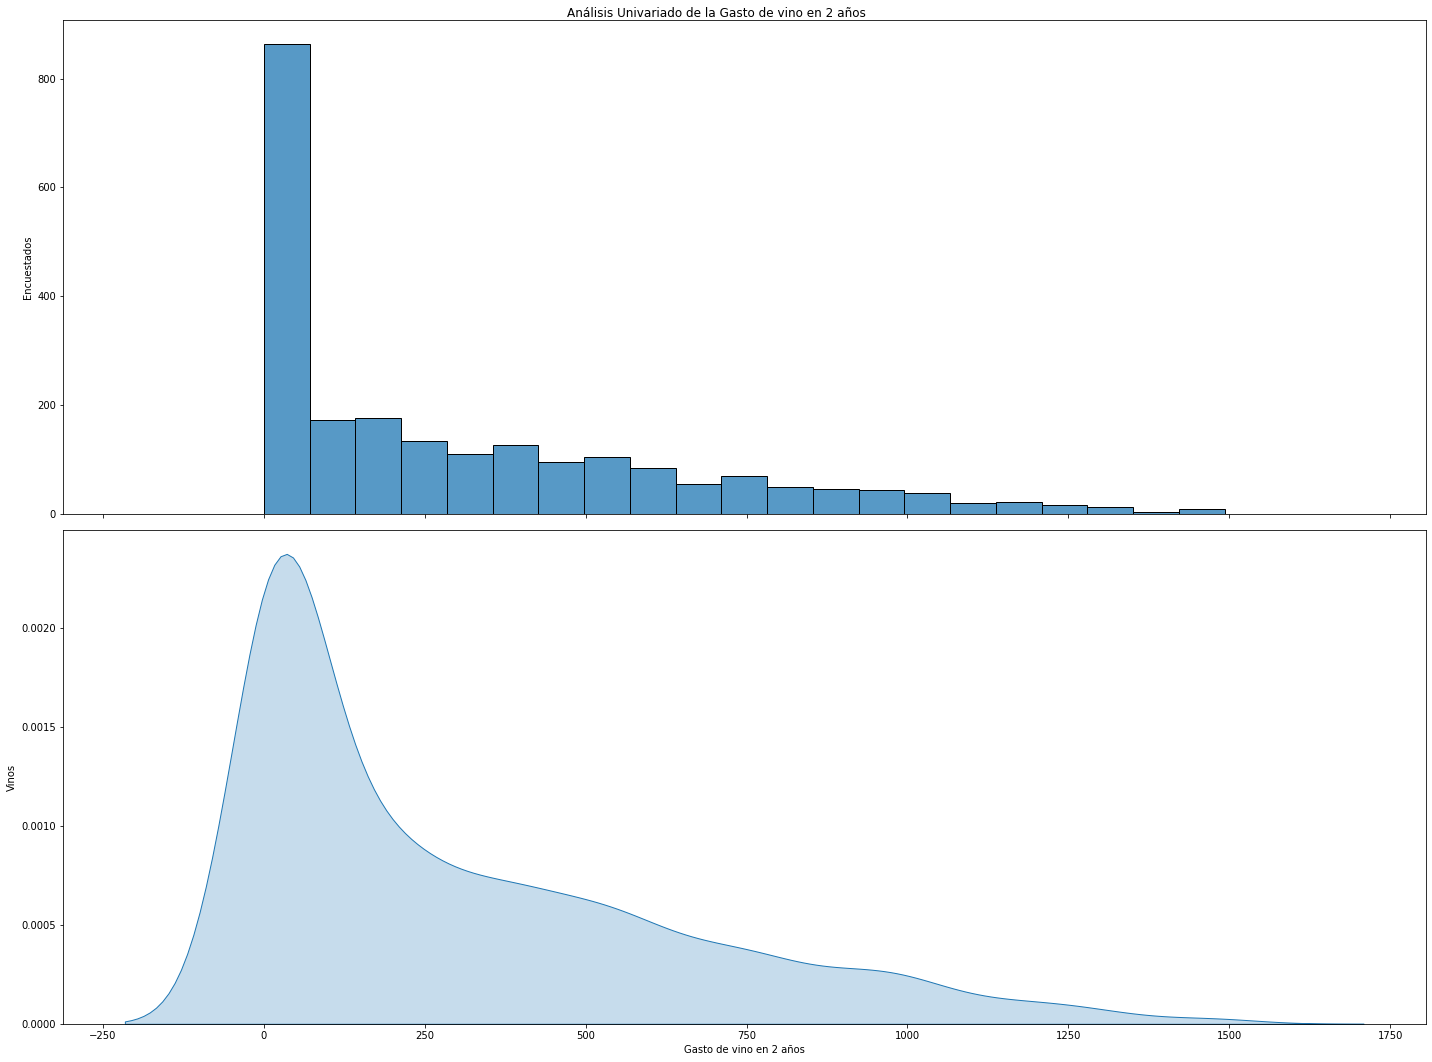

In [25]:
#Compras vinos por visita
var = 'MntWines'
var_title = 'Gasto de vino en 2 años' 
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 15), sharex=True)


# Plotea el histograma
sns.histplot(data=df[var], ax=ax[0], kde=False)
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Encuestados')


# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[1], fill=True)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Vinos')




fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

In [26]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

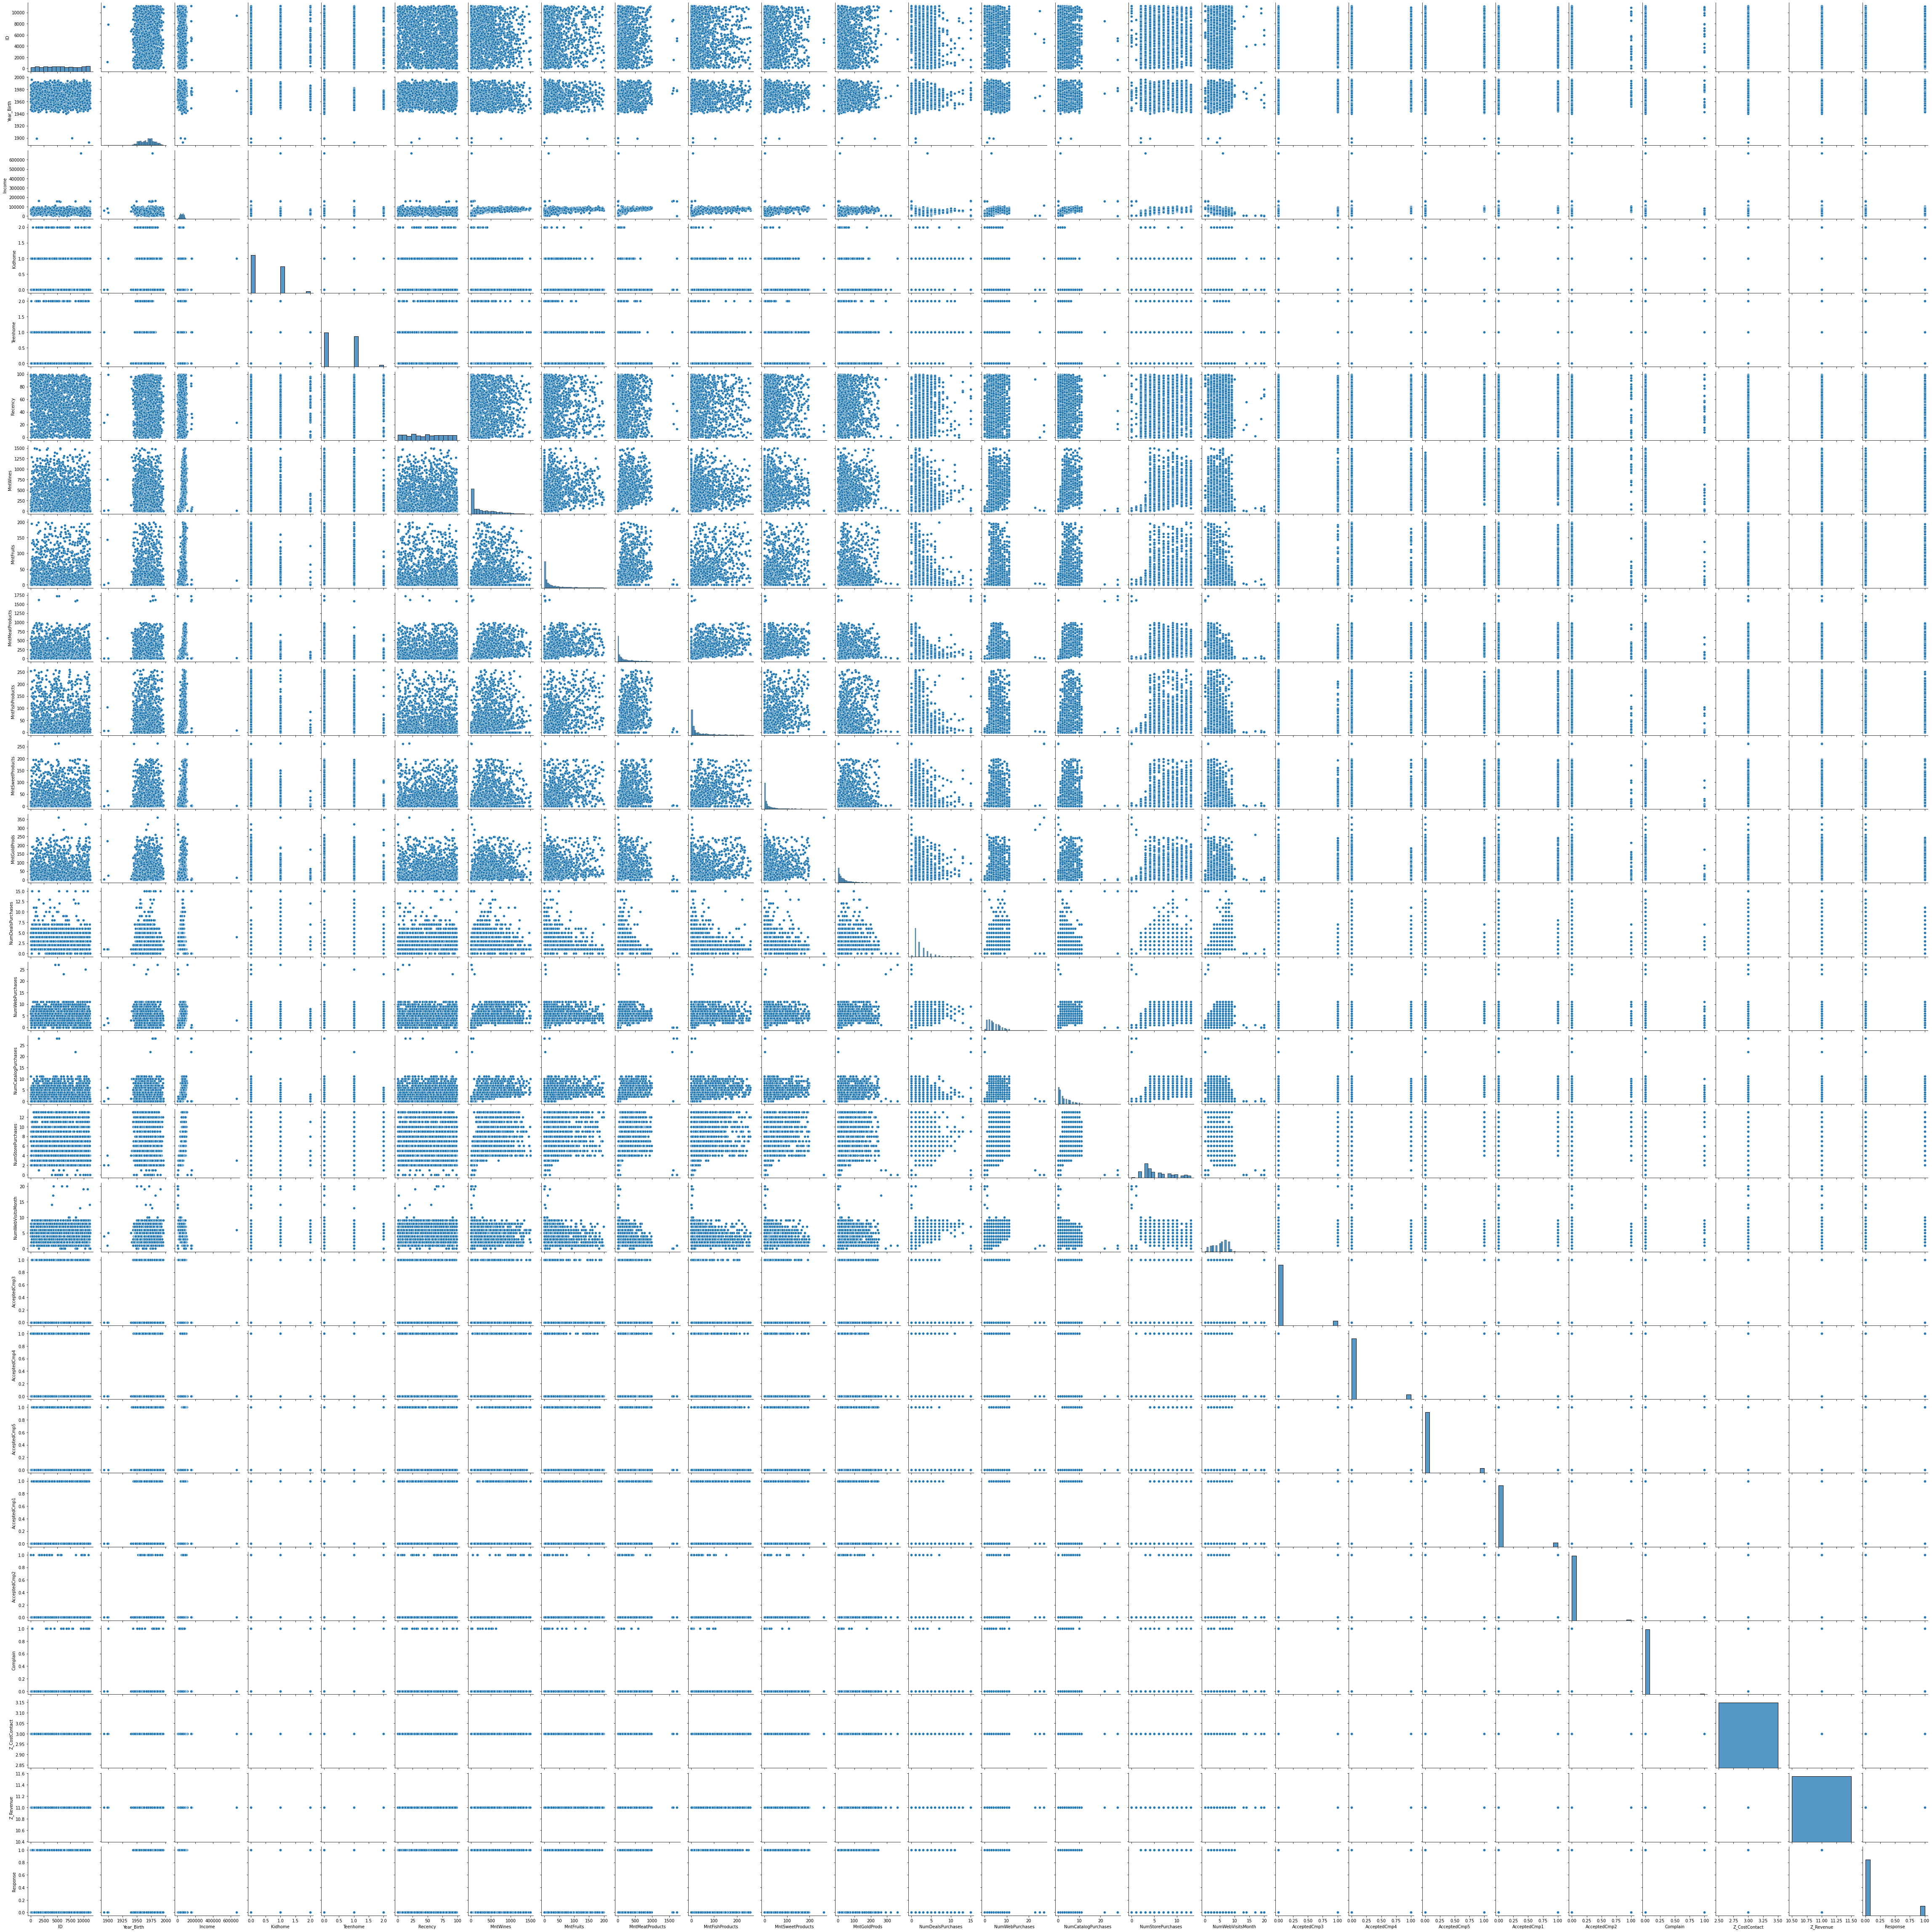

In [27]:
#Un gráfico en el que se puede ver todos los datos numéricos comparados con todos los datos numéricos
df_test = df[list_keys]
sns.pairplot(df_test, diag_kind="hist")

In [28]:
df_correlation = df[list_keys]
df_correlation.corr()

<ipython-input-28-66ca58fc8541>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlation.corr()


ID 
 Year_Birth 
 Income 
 Kidhome 
 Teenhome 
 Recency 
 MntWines 
 MntFruits 
 MntMeatProducts 
 MntFishProducts 
 ... 
 NumWebVisitsMonth 
 AcceptedCmp3 
 AcceptedCmp4 
 AcceptedCmp5 
 AcceptedCmp1 
 AcceptedCmp2 
 Complain 
 Z_CostContact 
 Z_Revenue 
 Response 
 
 
 
 
 ID 
 1.000000 
 0.000028 
 0.013095 
 0.002406 
 -0.002580 
 -0.046524 
 -0.022878 
 0.004600 
 -0.004437 
 -0.024475 
 ... 
 -0.007446 
 -0.036040 
 -0.025387 
 -0.007517 
 -0.021614 
 -0.015061 
 0.033883 
 NaN 
 NaN 
 -0.021968 
 
 
 Year_Birth 
 0.000028 
 1.000000 
 -0.161791 
 0.230176 
 -0.352111 
 -0.019871 
 -0.157773 
 -0.017917 
 -0.030872 
 -0.041625 
 ... 
 0.121139 
 0.061774 
 -0.060510 
 0.007123 
 -0.005930 
 -0.006539 
 -0.030128 
 NaN 
 NaN 
 0.021325 
 
 
 Income 
 0.013095 
 -0.161791 
 1.000000 
 -0.428669 
 0.019133 
 -0.003970 
 0.578650 
 0.430842 
 0.584633 
 0.438871 
 ... 
 -0.553088 
 -0.016174 
 0.184400 
 0.335943 
 0.276820 
 0.087545 
 -0.027225 
 NaN 
 NaN 
 0.133047 
 
 
 Kidhome 
 0.002406 
 0.230176 
 -0.428669 
 1.000000 
 -0.036133 
 0.008827 
 -0.496297 
 -0.372581 
 -0.437129 
 -0.387644 
 ... 
 0.447846 
 0.014674 
 -0.161600 
 -0.205634 
 -0.172339 
 -0.081716 
 0.040207 
 NaN 
 NaN 
 -0.080008 
 
 
 Teenhome 
 -0.002580 
 -0.352111 
 0.019133 
 -0.036133 
 1.000000 
 0.016198 
 0.004846 
 -0.176764 
 -0.261160 
 -0.204187 
 ... 
 0.134884 
 -0.042677 
 0.038886 
 -0.191050 
 -0.140090 
 -0.015605 
 0.003138 
 NaN 
 NaN 
 -0.154446 
 
 
 Recency 
 -0.046524 
 -0.019871 
 -0.003970 
 0.008827 
 0.016198 
 1.000000 
 0.016064 
 -0.004306 
 0.023056 
 0.001079 
 ... 
 -0.021445 
 -0.032991 
 0.018826 
 0.000129 
 -0.019283 
 -0.001781 
 0.013231 
 NaN 
 NaN 
 -0.198437 
 
 
 MntWines 
 -0.022878 
 -0.157773 
 0.578650 
 -0.496297 
 0.004846 
 0.016064 
 1.000000 
 0.389637 
 0.562667 
 0.399753 
 ... 
 -0.320653 
 0.062202 
 0.373286 
 0.472613 
 0.354133 
 0.205907 
 -0.039007 
 NaN 
 NaN 
 0.247254 
 
 
 MntFruits 
 0.004600 
 -0.017917 
 0.430842 
 -0.372581 
 -0.176764 
 -0.004306 
 0.389637 
 1.000000 
 0.543105 
 0.594804 
 ... 
 -0.418383 
 0.014727 
 0.010152 
 0.215833 
 0.194748 
 -0.009773 
 -0.005166 
 NaN 
 NaN 
 0.125289 
 
 
 MntMeatProducts 
 -0.004437 
 -0.030872 
 0.584633 
 -0.437129 
 -0.261160 
 0.023056 
 0.562667 
 0.543105 
 1.000000 
 0.568402 
 ... 
 -0.539470 
 0.018272 
 0.102912 
 0.373769 
 0.309761 
 0.043033 
 -0.023483 
 NaN 
 NaN 
 0.236335 
 
 
 MntFishProducts 
 -0.024475 
 -0.041625 
 0.438871 
 -0.387644 
 -0.204187 
 0.001079 
 0.399753 
 0.594804 
 0.568402 
 1.000000 
 ... 
 -0.446003 
 0.000357 
 0.016843 
 0.199578 
 0.260762 
 0.002577 
 -0.020953 
 NaN 
 NaN 
 0.111331 
 
 
 MntSweetProducts 
 -0.007642 
 -0.018133 
 0.440744 
 -0.370673 
 -0.162475 
 0.022670 
 0.386581 
 0.567164 
 0.523846 
 0.579870 
 ... 
 -0.423294 
 0.001530 
 0.028641 
 0.259590 
 0.241818 
 0.009985 
 -0.022485 
 NaN 
 NaN 
 0.117372 
 
 
 MntGoldProds 
 -0.013438 
 -0.061818 
 0.325916 
 -0.349595 
 -0.021725 
 0.016693 
 0.387516 
 0.392995 
 0.350609 
 0.422875 
 ... 
 -0.250719 
 0.123091 
 0.022268 
 0.181021 
 0.166396 
 0.049990 
 -0.030861 
 NaN 
 NaN 
 0.139850 
 
 
 NumDealsPurchases 
 -0.037166 
 -0.060846 
 -0.083101 
 0.221798 
 0.387741 
 -0.001098 
 0.010940 
 -0.132114 
 -0.122415 
 -0.139361 
 ... 
 0.347633 
 -0.023109 
 0.015594 
 -0.183248 
 -0.123244 
 -0.037695 
 0.000420 
 NaN 
 NaN 
 0.002238 
 
 
 NumWebPurchases 
 -0.018924 
 -0.145040 
 0.387878 
 -0.361647 
 0.155500 
 -0.010726 
 0.542265 
 0.296735 
 0.293761 
 0.293681 
 ... 
 -0.055846 
 0.042176 
 0.155903 
 0.138684 
 0.155143 
 0.034188 
 -0.016310 
 NaN 
 NaN 
 0.148730 
 
 
 NumCatalogPurchases 
 -0.003440 
 -0.121275 
 0.589162 
 -0.502237 
 -0.110769 
 0.025110 
 0.635226 
 0.487917 
 0.723827 
 0.534478 
 ... 
 -0.520364 
 0.104730 
 0.139247 
 0.322321 
 0.308097 
 0.099852 
 -0.020453 
 NaN 
 NaN 
 0.220810 
 
 
 NumStorePurchases 
 -0.014927 
 -0.128272 
 0.529362 
 -0.499683 
 0.050695 
 0.000799 
 0.642

In [29]:
print(df_house.corr())

                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.021725   
NumDealsPurchases   -0.03

<ipython-input-29-21cdde61ebfe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_house.corr())


<ipython-input-30-51787486b19a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_correlation.corr(), cmap='YlGnBu', annot=True);


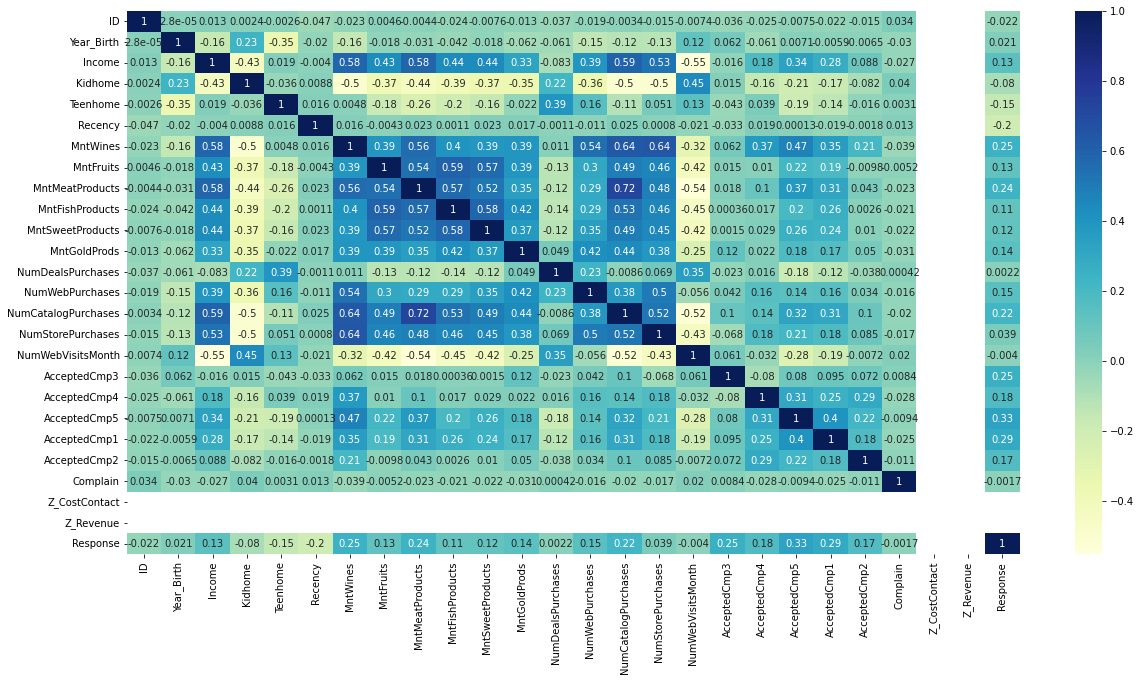

In [30]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(df_correlation.corr(), cmap='YlGnBu', annot=True);

In [31]:
df_house_v2 = df_house
df_house_v2.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Remover campos altamente o poco correlacionados

In [32]:
df_house_v2 = df_house_v2.drop('ID',axis=1) # No aporta informacion relevante
df_house_v2 = df_house_v2.drop('Complain',axis=1) # Poca correlacion
df_house_v2 = df_house_v2.drop('Recency',axis=1) # Poca correlacion
df_house_v2 = df_house_v2.drop('Z_CostContact',axis=1) # Datos constantes
df_house_v2 = df_house_v2.drop('Z_Revenue',axis=1) # Datos constantes
#df_house_v2 = df_house_v2.drop('MEDV',axis=1)
#df_house_v2

<ipython-input-33-cda8ec475ca9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_house_v2.corr(), cmap='YlGnBu', annot=True);


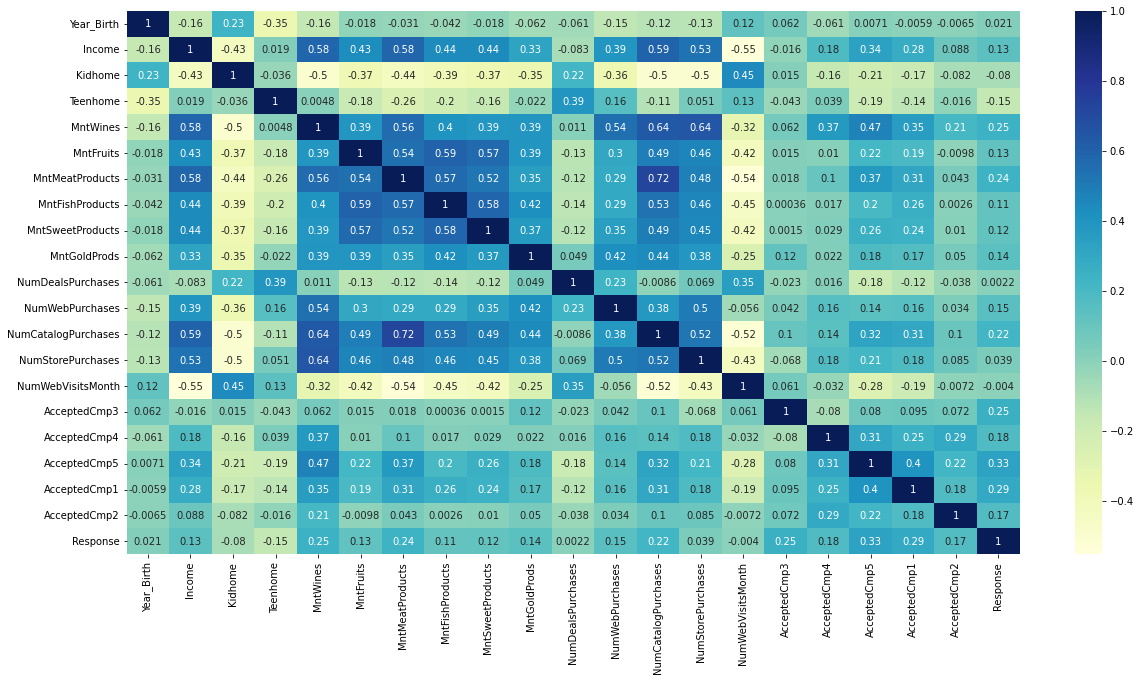

In [33]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(df_house_v2.corr(), cmap='YlGnBu', annot=True);

In [35]:
df_house_v2.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response'],
      dtype='object')

# Transformacion de variables categoricas


In [36]:
df_tests = df_house_v2
one_hot_encoded_data = pd.get_dummies(df_tests, columns = ['Education', 'Marital_Status']) 
df_house_v2 = one_hot_encoded_data

# Transformacion de variables de fecha

In [37]:

df_house_v2['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df_house_v2.dtypes

<ipython-input-37-654b2170d41d>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_house_v2['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


Year_Birth int64
Income float64
Kidhome int64
Teenhome int64
Dt_Customer datetime64[ns]
MntWines int64
MntFruits int64
MntMeatProducts int64
MntFishProducts int64
MntSweetProducts int64
MntGoldProds int64
NumDealsPurchases int64
NumWebPurchases int64
NumCatalogPurchases int64
NumStorePurchases int64
NumWebVisitsMonth int64
AcceptedCmp3 int64
AcceptedCmp4 int64
AcceptedCmp5 int64
AcceptedCmp1 int64
AcceptedCmp2 int64
Response int64
Education_2n Cycle uint8
Education_Basic uint8
Education_Graduation uint8
Education_Master uint8
Education_PhD uint8
Marital_Status_Absurd uint8
Marital_Status_Alone uint8
Marital_Status_Divorced uint8
Marital_Status_Married uint8
Marital_Status_Single uint8
Marital_Status_Together uint8
Marital_Status_Widow uint8
Marital_Status_YOLO uint8
dtype: object

In [38]:
df_house_v2['Dt_Customer_year'] = df_house_v2['Dt_Customer'].dt.year
df_house_v2['Dt_Customer_month'] = df_house_v2['Dt_Customer'].dt.month
df_house_v2['Dt_Customer_day'] = df_house_v2['Dt_Customer'].dt.day
#df_house_v2['Dt_Customer_hour'] = df_house_v2['Dt_Customer'].dt.hour
#df_house_v2['Dt_Customer_minute'] = df_house_v2['Dt_Customer'].dt.minute

df_house_v2 = df_house_v2.drop('Dt_Customer',axis=1) # Dato objeto ya no es necesario

df_house_v2.head()

Year_Birth 
 Income 
 Kidhome 
 Teenhome 
 MntWines 
 MntFruits 
 MntMeatProducts 
 MntFishProducts 
 MntSweetProducts 
 MntGoldProds 
 ... 
 Marital_Status_Alone 
 Marital_Status_Divorced 
 Marital_Status_Married 
 Marital_Status_Single 
 Marital_Status_Together 
 Marital_Status_Widow 
 Marital_Status_YOLO 
 Dt_Customer_year 
 Dt_Customer_month 
 Dt_Customer_day 
 
 
 
 
 0 
 1957 
 58138.0 
 0 
 0 
 635 
 88 
 546 
 172 
 88 
 88 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 2012 
 4 
 9 
 
 
 1 
 1954 
 46344.0 
 1 
 1 
 11 
 1 
 6 
 2 
 1 
 6 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 0 
 2014 
 8 
 3 
 
 
 2 
 1965 
 71613.0 
 0 
 0 
 426 
 49 
 127 
 111 
 21 
 42 
 ... 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 2013 
 8 
 21 
 
 
 3 
 1984 
 26646.0 
 1 
 0 
 11 
 4 
 20 
 10 
 3 
 5 
 ... 
 0 
 0 
 0 
 0 
 1 
 0 
 0 
 2014 
 10 
 2 
 
 
 4 
 1981 
 58293.0 
 1 
 0 
 173 
 43 
 118 
 46 
 27 
 15 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 0 
 2014 
 1 
 19 
 
 
 
 5 rows × 37 columns

# Set Train y testing

In [39]:

df_house_v2.isnull().sum()
print('antes de quitar nulls', len(df_house_v2))
# removiendo renglones con Income en null
df_house_v2 = df_house_v2[df_house_v2['Income'].notna()]
print('después de quitar nulls', len(df_house_v2))

antes de quitar nulls 2240
después de quitar nulls 2216


In [40]:
df_house_v2 = df_house_v2.drop(df_house_v2['Income'].idxmax())

In [41]:
df_house_v2.describe()

Year_Birth 
 Income 
 Kidhome 
 Teenhome 
 MntWines 
 MntFruits 
 MntMeatProducts 
 MntFishProducts 
 MntSweetProducts 
 MntGoldProds 
 ... 
 Marital_Status_Alone 
 Marital_Status_Divorced 
 Marital_Status_Married 
 Marital_Status_Single 
 Marital_Status_Together 
 Marital_Status_Widow 
 Marital_Status_YOLO 
 Dt_Customer_year 
 Dt_Customer_month 
 Dt_Customer_day 
 
 
 
 
 count 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 ... 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 
 
 mean 
 1968.816704 
 51969.861400 
 0.441535 
 0.505643 
 305.225282 
 26.361625 
 167.063205 
 37.651016 
 27.040632 
 43.979684 
 ... 
 0.001354 
 0.104740 
 0.386907 
 0.212641 
 0.258239 
 0.034312 
 0.000903 
 2013.028442 
 6.519187 
 15.605869 
 
 
 std 
 11.987000 
 21526.320095 
 0.536886 
 0.544198 
 337.345380 
 39.802036 
 224.311559 
 54.760822 
 41.077594 
 51.822660 
 ... 
 0.036786 
 0.306288 
 0.487152 
 0.409268 
 0.437765 
 0.182069 
 0.030042 
 0.685772 
 3.509243 
 8.831017 
 
 
 min 
 1893.000000 
 1730.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 2012.000000 
 1.000000 
 1.000000 
 
 
 25% 
 1959.000000 
 35284.000000 
 0.000000 
 0.000000 
 24.000000 
 2.000000 
 16.000000 
 3.000000 
 1.000000 
 9.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 2013.000000 
 3.000000 
 8.000000 
 
 
 50% 
 1970.000000 
 51373.000000 
 0.000000 
 0.000000 
 175.000000 
 8.000000 
 68.000000 
 12.000000 
 8.000000 
 25.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 2013.000000 
 6.000000 
 16.000000 
 
 
 75% 
 1977.000000 
 68487.000000 
 1.000000 
 1.000000 
 505.000000 
 33.000000 
 232.500000 
 50.000000 
 33.000000 
 56.000000 
 ... 
 0.000000 
 0.000000 
 1.000000 
 0.000000 
 1.000000 
 0.000000 
 0.000000 
 2013.000000 
 10.000000 
 23.000000 
 
 
 max 
 1996.000000 
 162397.000000 
 2.000000 
 2.000000 
 1493.000000 
 199.000000 
 1725.000000 
 259.000000 
 262.000000 
 321.000000 
 ... 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 2014.000000 
 12.000000 
 31.000000 
 
 
 
 8 rows × 37 columns

In [43]:
X,y = df_house_v2,df_house_v2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Revisando outliers

In [44]:

#df_house_v2['Year_Birth'].min()
#df_house_v2 = df_house_v2[df_house_v2['Year_Birth'] != df_house_v2['Year_Birth'].max()]
#df_house_v2 = df_house_v2[df_house_v2['Year_Birth'] != df_house_v2['Year_Birth'].min()]
#print('después de quitar nulls', len(df_house_v2))

In [45]:
df_house_v2.describe()

Year_Birth 
 Income 
 Kidhome 
 Teenhome 
 MntWines 
 MntFruits 
 MntMeatProducts 
 MntFishProducts 
 MntSweetProducts 
 MntGoldProds 
 ... 
 Marital_Status_Alone 
 Marital_Status_Divorced 
 Marital_Status_Married 
 Marital_Status_Single 
 Marital_Status_Together 
 Marital_Status_Widow 
 Marital_Status_YOLO 
 Dt_Customer_year 
 Dt_Customer_month 
 Dt_Customer_day 
 
 
 
 
 count 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 ... 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 2215.000000 
 
 
 mean 
 1968.816704 
 51969.861400 
 0.441535 
 0.505643 
 305.225282 
 26.361625 
 167.063205 
 37.651016 
 27.040632 
 43.979684 
 ... 
 0.001354 
 0.104740 
 0.386907 
 0.212641 
 0.258239 
 0.034312 
 0.000903 
 2013.028442 
 6.519187 
 15.605869 
 
 
 std 
 11.987000 
 21526.320095 
 0.536886 
 0.544198 
 337.345380 
 39.802036 
 224.311559 
 54.760822 
 41.077594 
 51.822660 
 ... 
 0.036786 
 0.306288 
 0.487152 
 0.409268 
 0.437765 
 0.182069 
 0.030042 
 0.685772 
 3.509243 
 8.831017 
 
 
 min 
 1893.000000 
 1730.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 2012.000000 
 1.000000 
 1.000000 
 
 
 25% 
 1959.000000 
 35284.000000 
 0.000000 
 0.000000 
 24.000000 
 2.000000 
 16.000000 
 3.000000 
 1.000000 
 9.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 2013.000000 
 3.000000 
 8.000000 
 
 
 50% 
 1970.000000 
 51373.000000 
 0.000000 
 0.000000 
 175.000000 
 8.000000 
 68.000000 
 12.000000 
 8.000000 
 25.000000 
 ... 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 2013.000000 
 6.000000 
 16.000000 
 
 
 75% 
 1977.000000 
 68487.000000 
 1.000000 
 1.000000 
 505.000000 
 33.000000 
 232.500000 
 50.000000 
 33.000000 
 56.000000 
 ... 
 0.000000 
 0.000000 
 1.000000 
 0.000000 
 1.000000 
 0.000000 
 0.000000 
 2013.000000 
 10.000000 
 23.000000 
 
 
 max 
 1996.000000 
 162397.000000 
 2.000000 
 2.000000 
 1493.000000 
 199.000000 
 1725.000000 
 259.000000 
 262.000000 
 321.000000 
 ... 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 2014.000000 
 12.000000 
 31.000000 
 
 
 
 8 rows × 37 columns

# PCA

In [46]:
#numero de componentes
pca = PCA(n_components = 10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [47]:
#el acumulado de varianza explicada en las nuevas dimensiones
expl = pca.explained_variance_ratio_
print(expl)
print('suma',sum(expl))

[9.99796646e-01 1.37338531e-04 5.20347004e-05 6.37922122e-06
 3.57173935e-06 2.02570339e-06 1.47927525e-06 2.84458532e-07
 1.66826877e-07 2.64691475e-08]
suma 0.9999999525903552


# Graficar el acumulado de varianza explicada en las nuevas dimensiones

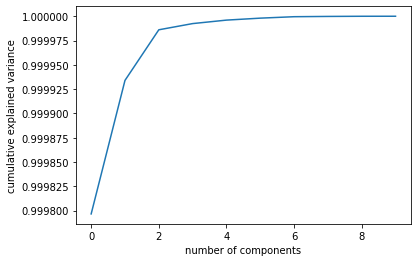

In [48]:
#graficar el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(expl))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [49]:
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
df_pca = pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2','PC3'])
df_pca

PC1 
 PC2 
 PC3 
 
 
 
 
 0 
 21150.365449 
 310.970589 
 -37.918859 
 
 
 1 
 -48794.035155 
 -243.861023 
 111.340203 
 
 
 2 
 -10286.623560 
 84.997258 
 -63.851804 
 
 
 3 
 -35148.941289 
 -91.485061 
 65.677956 
 
 
 4 
 17105.069247 
 116.207490 
 -95.834359 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 1545 
 -18712.881279 
 78.490408 
 13.512292 
 
 
 1546 
 17604.663285 
 188.683054 
 -18.074761 
 
 
 1547 
 -11538.195704 
 130.569104 
 -44.828173 
 
 
 1548 
 -2318.295328 
 198.076211 
 -53.443393 
 
 
 1549 
 -14367.369250 
 -38.424633 
 -35.625697 
 
 
 
 1550 rows × 3 columns

In [50]:
len(X_train_pca)

1550

In [51]:
len(X_test_pca)

665

# Kmeans++ 

# Elbow method

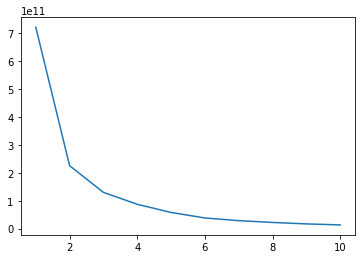

In [52]:
X_pca_plus = df_pca[['PC1', 'PC2','PC3']]
X_pca_ramdon = df_pca[['PC1', 'PC2','PC3']]
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=20, random_state=0)
    kmeans.fit(X_train_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(1,11),sse)
plt.show() 

# init='k-means++'

In [53]:
# Predicting the clusters
n_clusters_ = 5
kmeans_ = KMeans(n_clusters=n_clusters_, init='k-means++', max_iter=100, n_init=20, random_state=0)
labels = kmeans_.fit(X_train_pca)
y_kmeans = kmeans_.fit_predict(X_train_pca)
C = kmeans_.cluster_centers_
C

array([[-1.04674701e+04, 8.85367191e+01, -2.99573490e+01],
 [ 9.44346910e+03, -4.30416844e+01, -5.91289437e+01],
 [-2.92807614e+04, -2.98021999e+01, 4.90098535e+01],
 [ 1.05338215e+05, 1.49293063e+03, -2.29859629e+02],
 [ 2.77114439e+04, -6.15284677e+01, 7.99874255e+01]])

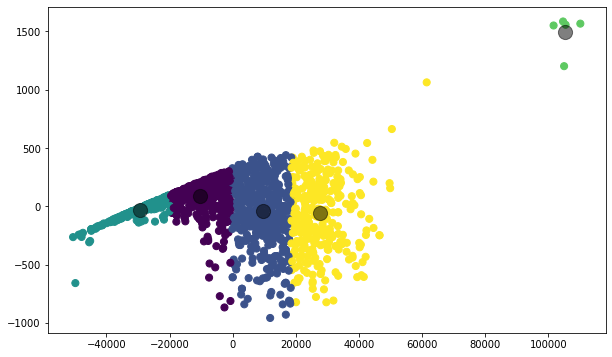

In [54]:
centers = C
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [55]:
X_pca_plus['labels']= y_kmeans
X_pca_plus

PC1 
 PC2 
 PC3 
 labels 
 
 
 
 
 0 
 21150.365449 
 310.970589 
 -37.918859 
 4 
 
 
 1 
 -48794.035155 
 -243.861023 
 111.340203 
 2 
 
 
 2 
 -10286.623560 
 84.997258 
 -63.851804 
 0 
 
 
 3 
 -35148.941289 
 -91.485061 
 65.677956 
 2 
 
 
 4 
 17105.069247 
 116.207490 
 -95.834359 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1545 
 -18712.881279 
 78.490408 
 13.512292 
 0 
 
 
 1546 
 17604.663285 
 188.683054 
 -18.074761 
 1 
 
 
 1547 
 -11538.195704 
 130.569104 
 -44.828173 
 0 
 
 
 1548 
 -2318.295328 
 198.076211 
 -53.443393 
 0 
 
 
 1549 
 -14367.369250 
 -38.424633 
 -35.625697 
 0 
 
 
 
 1550 rows × 4 columns

In [56]:
kmeans_random = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans_random.fit(X_train_pca)
y_kmeans = kmeans_random.fit_predict(X_train_pca)
C = kmeans_random.cluster_centers_
C

array([[ 2.47170379e+04, -5.07655876e+01, 4.36424034e+01],
 [-2.38980441e+04, 2.00103630e+01, 2.75847726e+01],
 [ 4.48668215e+02, 2.61465686e+01, -6.41764000e+01]])

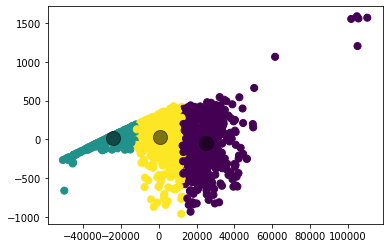

In [57]:
centers = C
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c = y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [58]:
X_pca_ramdon['labels']= kmeans_random.labels_
X_pca_ramdon

PC1 
 PC2 
 PC3 
 labels 
 
 
 
 
 0 
 21150.365449 
 310.970589 
 -37.918859 
 0 
 
 
 1 
 -48794.035155 
 -243.861023 
 111.340203 
 1 
 
 
 2 
 -10286.623560 
 84.997258 
 -63.851804 
 2 
 
 
 3 
 -35148.941289 
 -91.485061 
 65.677956 
 1 
 
 
 4 
 17105.069247 
 116.207490 
 -95.834359 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 1545 
 -18712.881279 
 78.490408 
 13.512292 
 1 
 
 
 1546 
 17604.663285 
 188.683054 
 -18.074761 
 0 
 
 
 1547 
 -11538.195704 
 130.569104 
 -44.828173 
 2 
 
 
 1548 
 -2318.295328 
 198.076211 
 -53.443393 
 2 
 
 
 1549 
 -14367.369250 
 -38.424633 
 -35.625697 
 1 
 
 
 
 1550 rows × 4 columns

<Axes: xlabel='PC1', ylabel='PC2'>

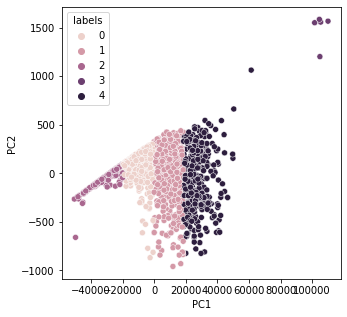

In [59]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=X_pca_plus, x="PC1", y="PC2", ax=ax, hue="labels")

# SVM

In [61]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [62]:
X = X_pca_plus[['PC1', 'PC2','PC3']].values
y = X_pca_plus.labels
y

0 4
1 2
2 0
3 2
4 1
 ..
1545 0
1546 1
1547 0
1548 0
1549 0
Name: labels, Length: 1550, dtype: int32

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
clf_svm = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf_svm.fit(X_train, y_train)

SVC(kernel='linear') In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. SVC SVC(kernel='linear')

In [64]:
#Predict the response for test dataset
y_pred = clf_svm.predict(X_test)

In [65]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9956989247311828


# Create dataframe with predict values

In [66]:
#y_pred
#X_test
df_predict = pd.DataFrame(X_test, columns = ['PC1','PC2','PC3'])
df_predict['labels'] = y_pred
df_predict

PC1 
 PC2 
 PC3 
 labels 
 
 
 
 
 0 
 7674.981521 
 265.083004 
 12.187127 
 1 
 
 
 1 
 5009.944748 
 -32.064157 
 143.777410 
 1 
 
 
 2 
 -22537.010936 
 -7.540158 
 53.401996 
 2 
 
 
 3 
 -6284.054966 
 227.847322 
 -73.597578 
 0 
 
 
 4 
 31553.654628 
 -249.800916 
 -87.951325 
 4 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 460 
 -7763.994074 
 -297.638204 
 -96.815299 
 0 
 
 
 461 
 -21773.717759 
 -114.419648 
 39.424822 
 2 
 
 
 462 
 -11538.195704 
 130.569104 
 -44.828173 
 0 
 
 
 463 
 -9627.229418 
 64.057385 
 -41.610192 
 0 
 
 
 464 
 -7139.281472 
 246.081667 
 -59.632461 
 0 
 
 
 
 465 rows × 4 columns

In [67]:
len(X)

1550

In [68]:
#X_pca_ramdon.loc[X_pca_ramdon['labels' == 1]]

#X_pca_plus
df_plus = df_predict.loc[(df_predict['labels'] == 0) | (df_predict['labels'] == 2)]
X_1 = df_plus[['PC1', 'PC2','PC3']].values
y_1 = df_plus.labels


df_noceros = df.copy()
df_noceros = df_noceros[[var_wines, var_sweet, var_gold]]
df_noceros[var_wines] = df_noceros[df_noceros[var_wines] != 0]
df_noceros[var_sweet] = df_noceros[df_noceros[var_sweet] != 0] 
df_noceros[var_gold] = df_noceros[var_gold][df_noceros[var_gold] != 0]



Text(0.5, 1.0, 'Rectaaradora')

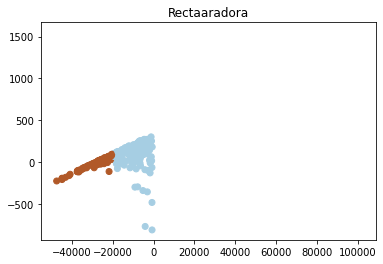

In [69]:
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

plt.title('Rectaaradora')

In [70]:
df_plus = df_predict.loc[(df_predict['labels'] == 1) | (df_predict['labels'] == 2)]
X_1 = df_plus[['PC1', 'PC2','PC3']].values
y_1 = df_plus.labels


df_noceros = df.copy()
df_noceros = df_noceros[[var_wines, var_sweet, var_gold]]
df_noceros[var_wines] = df_noceros[df_noceros[var_wines] != 0]
df_noceros[var_sweet] = df_noceros[df_noceros[var_sweet] != 0] 
df_noceros[var_gold] = df_noceros[var_gold][df_noceros[var_gold] != 0]



Text(0.5, 1.0, 'Rectaaradora')

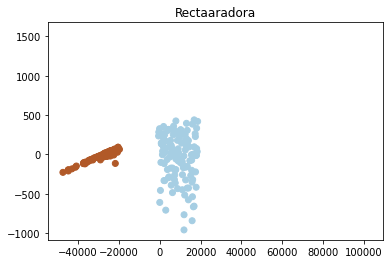

In [71]:
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

#Gráfica

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
 s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('Rectaaradora')

In [72]:
df_plus = df_predict.loc[(df_predict['labels'] == 1) | (df_predict['labels'] == 0)]
X_1 = df_plus[['PC1', 'PC2','PC3']].values
y_1 = df_plus.labels


df_noceros = df.copy()
df_noceros = df_noceros[[var_wines, var_sweet, var_gold]]
df_noceros[var_wines] = df_noceros[df_noceros[var_wines] != 0]
df_noceros[var_sweet] = df_noceros[df_noceros[var_sweet] != 0] 
df_noceros[var_gold] = df_noceros[var_gold][df_noceros[var_gold] != 0]



Text(0.5, 1.0, 'Rectaaradora')

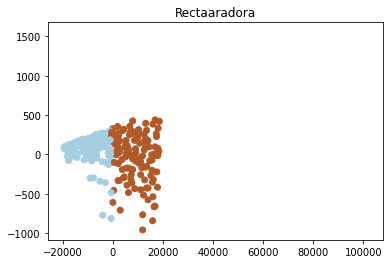

In [73]:
#MMC 
print(__doc__)

#Librerías requeridas

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Se crean los datos
X = X_1
Y = y_1

#Se estima el modelo
clf = clf_svm

# Se construye la recta que separa las clases
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

#Gráfica

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title('Rectaaradora')

<Axes: xlabel='PC1', ylabel='PC3'>

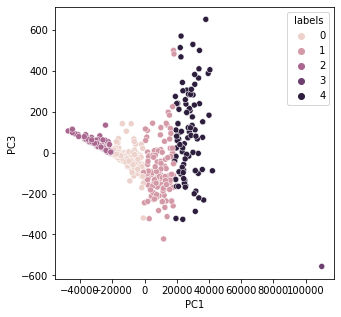

In [74]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df_predict, x="PC1", y="PC3", ax=ax, hue="labels")

In [75]:
import pickle

In [76]:
pickle_file_pca = 'pca_model_integrador.plk'
with open(pickle_file_pca,'wb') as file:
    pickle.dump(pca,file)

pickle_file_kmeans = 'kmeans_model_integrador.plk'
with open(pickle_file_kmeans,'wb') as file:
    pickle.dump(kmeans_,file)

pickle_file_svm = 'svm_model_integrador.plk'
with open(pickle_file_svm,'wb') as file:
    pickle.dump(clf_svm,file)

In [77]:
#PCA
with open(pickle_file_pca,'rb') as file:
    pickle_pca = pickle.load(file)
X_PCA = pickle_pca.transform(df_house_v2)
len(X_PCA)

2215

In [78]:
#SVM 
with open(pickle_file_svm,'rb') as file:
    pickle_svm = pickle.load(file)
X_SVM = pickle_svm.predict(X_PCA)
X_SVM

array([1, 0, 4, ..., 1, 1, 1], dtype=int32)

In [79]:
df_house_v2['labels'] = X_SVM

In [80]:
df_house_v2.to_csv("marketing_campaign_2.csv")

In [81]:
df_house_v2

Year_Birth 
 Income 
 Kidhome 
 Teenhome 
 MntWines 
 MntFruits 
 MntMeatProducts 
 MntFishProducts 
 MntSweetProducts 
 MntGoldProds 
 ... 
 Marital_Status_Divorced 
 Marital_Status_Married 
 Marital_Status_Single 
 Marital_Status_Together 
 Marital_Status_Widow 
 Marital_Status_YOLO 
 Dt_Customer_year 
 Dt_Customer_month 
 Dt_Customer_day 
 labels 
 
 
 
 
 0 
 1957 
 58138.0 
 0 
 0 
 635 
 88 
 546 
 172 
 88 
 88 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 2012 
 4 
 9 
 1 
 
 
 1 
 1954 
 46344.0 
 1 
 1 
 11 
 1 
 6 
 2 
 1 
 6 
 ... 
 0 
 0 
 1 
 0 
 0 
 0 
 2014 
 8 
 3 
 0 
 
 
 2 
 1965 
 71613.0 
 0 
 0 
 426 
 49 
 127 
 111 
 21 
 42 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 2013 
 8 
 21 
 4 
 
 
 3 
 1984 
 26646.0 
 1 
 0 
 11 
 4 
 20 
 10 
 3 
 5 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 2014 
 10 
 2 
 2 
 
 
 4 
 1981 
 58293.0 
 1 
 0 
 173 
 43 
 118 
 46 
 27 
 15 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 2014 
 1 
 19 
 1 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2235 
 1967 
 61223.0 
 0 
 1 
 709 
 43 
 182 
 42 
 118 
 247 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 2013 
 6 
 13 
 1 
 
 
 2236 
 1946 
 64014.0 
 2 
 1 
 406 
 0 
 30 
 0 
 0 
 8 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 2014 
 10 
 6 
 1 
 
 
 2237 
 1981 
 56981.0 
 0 
 0 
 908 
 48 
 217 
 32 
 12 
 24 
 ... 
 1 
 0 
 0 
 0 
 0 
 0 
 2014 
 1 
 25 
 1 
 
 
 2238 
 1956 
 69245.0 
 0 
 1 
 428 
 30 
 214 
 80 
 30 
 61 
 ... 
 0 
 0 
 0 
 1 
 0 
 0 
 2014 
 1 
 24 
 1 
 
 
 2239 
 1954 
 52869.0 
 1 
 1 
 84 
 3 
 61 
 2 
 1 
 21 
 ... 
 0 
 1 
 0 
 0 
 0 
 0 
 2012 
 10 
 15 
 1 
 
 
 
 2215 rows × 38 columns

# Analisis Multivariado

In [82]:
df_house_v2.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Dt_Customer_year',
       'Dt_Customer_month', 'Dt_Customer_day', 'labels'],
      dtype='object')

# Categorias por ingreso

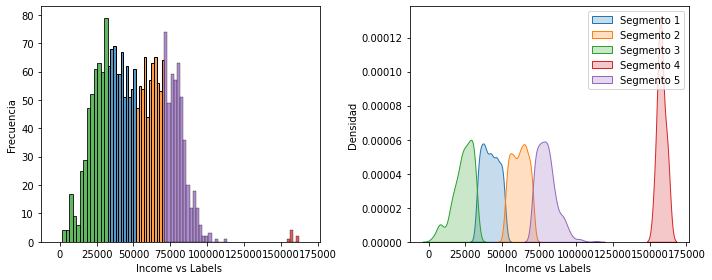

In [84]:
df = df_house_v2

var = 'Income'
var_title = 'Income vs Labels '

filter = df['labels'] == 0
df_segment_1 = df.loc[filter]

filter = df['labels'] == 1
df_segment_2 = df.loc[filter]

filter = df['labels'] == 2
df_segment_3 = df.loc[filter]

filter = df['labels'] == 3
df_segment_4 = df.loc[filter]

filter = df['labels'] == 4
df_segment_5 = df.loc[filter]

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_segment_1, x=var, label="Segmento 1", kde=False, ax=ax[0])
sns.histplot(data=df_segment_2, x=var, label="Segmento 2", kde=False, ax=ax[0])
sns.histplot(data=df_segment_3, x=var, label="Segmento 3", kde=False, ax=ax[0])
sns.histplot(data=df_segment_4, x=var, label="Segmento 4", kde=False, ax=ax[0])
sns.histplot(data=df_segment_5, x=var, label="Segmento 5", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_segment_1, x=var, label="Segmento 1", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_2,  x=var, label="Segmento 2", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_3,  x=var, label="Segmento 3", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_4,  x=var, label="Segmento 4", fill=True, ax=ax[1])
sns.kdeplot(data=df_segment_5,  x=var, label="Segmento 5", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()